In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import tensorflow_hub as hub

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import os

In [5]:
if os.path.exists('Digipodium\\input\\dog breed\\train\\affenpinscher\\00ca18751837cd6a22813f8e221f7819.jpg'):
    image = Image.open('Digipodium\\input\\dog breed\\train\\affenpinscher\\00ca18751837cd6a22813f8e221f7819.jpg')
    print(image.size)
else:
    print("error")

(450, 338)


In [6]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [7]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url,input_shape= (224,224,3))])

In [8]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [9]:
dataset_root = "Digipodium\\input\\dog breed\\train"
train_data = img_generator.flow_from_directory(dataset_root,target_size=IMAGE_SHAPE) 

Found 10222 images belonging to 120 classes.


In [10]:
import pandas as pd 
df=pd.read_csv('Digipodium\\input\\dog breed\\labels.csv')
ls= df['breed'].tolist()
ls1=list(dict.fromkeys(ls))
labels=ls1.sort()

In [11]:
# create and compile model
classifier.trainable=False
model = tf.keras.Sequential(
    [classifier,tf.keras.layers.Dense(train_data.num_classes)]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics= ['accuracy']
)

In [13]:
steps = np.floor(train_data.samples/train_data.batch_size)

In [14]:
history = model.fit(train_data,epochs=2,steps_per_epoch=steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 319.0 steps
Epoch 1/2
319/319 [==============================] - 332s 1s/step - loss: 1.4425 - accuracy: 0.6427
Epoch 2/2
319/319 [==============================] - 35s 111ms/step - loss: 0.4802 - accuracy: 0.8620


In [15]:
labels=list(train_data.class_indices.keys())

In [48]:
test_dataset_root = "Digipodium\\input\\dog breed\\test\\"
test_data = img_generator.flow_from_directory(test_dataset_root,target_size=IMAGE_SHAPE) 

Found 9 images belonging to 1 classes.


In [49]:
test_data.data_format

'channels_last'

In [50]:
ypred  = model.predict(test_data)
pred_id = np.argmax(ypred,axis = -1)
pred_id

array([ 66,  31,   0,  62,  43, 119,  68,   0,   1], dtype=int64)

In [51]:
actual_breeds=[name.split()[0].split('\\')[1] for name in test_data.filenames]
actual_breeds

['0ad84b0d9083b4e0dd5840ab77c4623b.jpg',
 '0ae295e67635319202b6fbc2b0be2fcb.jpg',
 '0ae4367c7f7149a43b0e5b1c07ce7ed9.jpg',
 '0aee2e38a7ac39c80dbf0dbc81e830a5.jpg',
 '0afdd7296357eed0c69a63fb228645d1.jpg',
 '0b73c34b32b7cfdec418cccd9b8a1edd.jpg',
 'affenpinscher',
 'afghan_hound',
 'yorkshire_terrier']

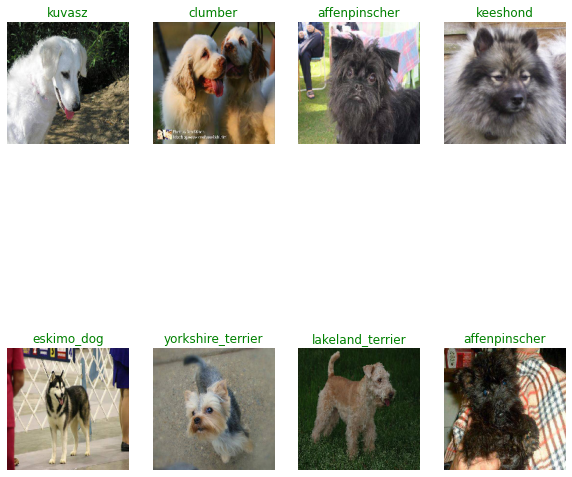

In [53]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(test_data[0][0][i])
    # if labels[pred_id[i]]==actual_breeds[i]:
    #     color='green'
    # else:
    #     color='red'
    plt.title(labels[pred_id[i]],color='green')
    plt.axis('off')
plt.show()

In [55]:
model.save('dogbreedfinal',save_format='tf')

INFO:tensorflow:Assets written to: dogbreedfinal\assets
INFO:tensorflow:Assets written to: dogbreedfinal\assets
